python verson : 3.10.11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.rcParams['font.family'] = 'AppleGothic'

In [14]:
# CSV 파일 경로
csv_file_path = '../src/dataCard.csv'

# CSV 파일을 DataFrame으로 읽어들이기
df = pd.read_csv(csv_file_path)

# DataFrame 출력
df

,Date,Time,이용카드명,Location,Domestic Amount (KRW),Discount Amount,Expected Points,Status,Payment Due Date,Approval Number
0,2023-03-31,22:45,KB국민 굿데이카드,쿠팡(쿠페이),20330,0,0,전표매입,2023-04-14,30023934
1,2023-03-31,22:39,KB국민 굿데이카드,쿠팡(쿠페이),16260,0,0,승인취소,NaN,30023923
2,2023-03-31,17:52,KB국민 CLiP카드,주식회사한우기업,6500,0,0,전표매입,2023-04-14,30023917
3,2023-03-31,17:36,KB국민 CLiP카드,세븐일레븐 강원대점,2400,0,0,전표매입,2023-04-14,30023903
4,2023-03-31,10:31,KB국민 CLiP카드,버스 1 건,1450,0,0,전표매입,2023-04-14,44763334
...,...,...,...,...,...,...,...,...,...,...
315,2023-01-02,18:01,KB국민 CLiP카드,세영식품(주) 강원대학교 이룸관점,4600,0,0,전표매입,2023-02-14,30020792
316,2023-01-02,15:11,KB국민 굿데이카드,서울시ETAX,172640,0,0,전표매입,2023-02-14,30020783
317,2023-01-02,13:00,KB국민 CLiP카드,강원대학교생활협동조합,3500,0,0,전표매입,2023-02-14,30020767
318,2023-01-01,19:54,KB국민 굿데이카드,최고집해물찜칼국수,70000,0,0,전표매입,2023-02-14,30020759


In [15]:
df.Status.unique()

array(['전표매입', '승인취소', '취소전표매입'], dtype=object)

In [16]:
df_filtered = df[df['Status'] == '전표매입']
df_filtered

,Date,Time,이용카드명,Location,Domestic Amount (KRW),Discount Amount,Expected Points,Status,Payment Due Date,Approval Number
0,2023-03-31,22:45,KB국민 굿데이카드,쿠팡(쿠페이),20330,0,0,전표매입,2023-04-14,30023934
2,2023-03-31,17:52,KB국민 CLiP카드,주식회사한우기업,6500,0,0,전표매입,2023-04-14,30023917
3,2023-03-31,17:36,KB국민 CLiP카드,세븐일레븐 강원대점,2400,0,0,전표매입,2023-04-14,30023903
4,2023-03-31,10:31,KB국민 CLiP카드,버스 1 건,1450,0,0,전표매입,2023-04-14,44763334
5,2023-03-31,10:31,KB국민 굿데이카드,버스 1 건,1550,0,0,전표매입,2023-04-14,44730399
...,...,...,...,...,...,...,...,...,...,...
315,2023-01-02,18:01,KB국민 CLiP카드,세영식품(주) 강원대학교 이룸관점,4600,0,0,전표매입,2023-02-14,30020792
316,2023-01-02,15:11,KB국민 굿데이카드,서울시ETAX,172640,0,0,전표매입,2023-02-14,30020783
317,2023-01-02,13:00,KB국민 CLiP카드,강원대학교생활협동조합,3500,0,0,전표매입,2023-02-14,30020767
318,2023-01-01,19:54,KB국민 굿데이카드,최고집해물찜칼국수,70000,0,0,전표매입,2023-02-14,30020759


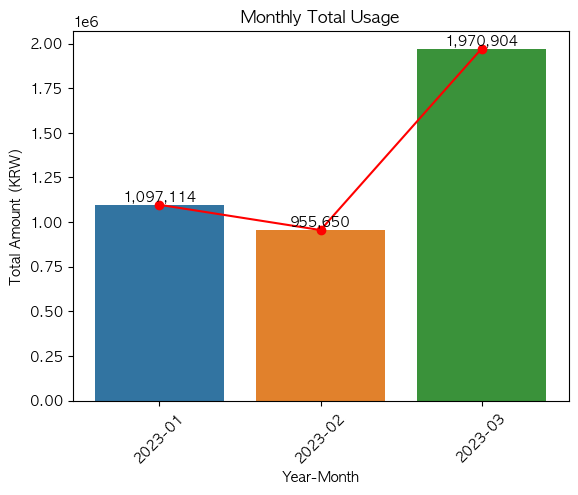

In [17]:
# 1. 월별 전체 사용량 시각화 (추세선 포함)
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_total = df.groupby('YearMonth')['Domestic Amount (KRW)'].sum()
monthly_total.index = monthly_total.index.astype(str)
monthly_total = monthly_total.astype(int)

sns.barplot(x=monthly_total.index, y=monthly_total)

# Connect the values of the bars
plt.plot(range(len(monthly_total)), monthly_total, marker='o', color='r')

# Add value labels
for i, value in enumerate(monthly_total):
    plt.text(i, value, f'{value:,}', ha='center', va='bottom')

plt.xlabel('Year-Month')
plt.ylabel('Total Amount (KRW)')
plt.title('Monthly Total Usage')
plt.xticks(rotation=45)

plt.savefig('../result_image/1.(상반기)월간카드사용량.jpeg', format='jpeg', dpi=300)
plt.show()

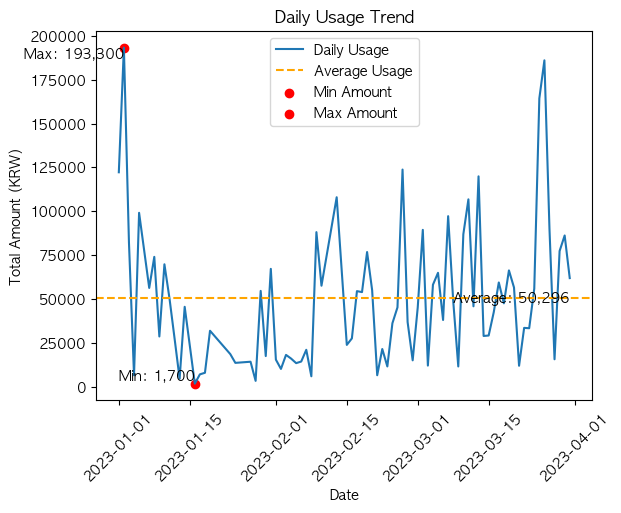

In [18]:
# 2. 일별 사용량 추세선 시각화
df['Date'] = pd.to_datetime(df['Date'])
daily_total = df.groupby('Date')['Domestic Amount (KRW)'].sum()
daily_mean = daily_total.mean()

# 최소금액과 최대금액을 구합니다.
daily_total_without_zero = daily_total[daily_total > 0]
min_amount = daily_total_without_zero.min()
max_amount = daily_total.max()

sns.lineplot(x=daily_total.index, y=daily_total, label='Daily Usage')
plt.axhline(daily_mean, color='orange', linestyle='--', label='Average Usage')
plt.text(daily_total.index[-1], daily_mean, f'Average: {daily_mean:,.0f}', ha='right', va='center')

# 최소금액과 최대금액을 표시합니다.
plt.scatter(daily_total.idxmin(), min_amount, color='red', marker='o', label='Min Amount')
plt.text(daily_total.idxmin(), min_amount, f'Min: {min_amount:,.0f}', ha='right', va='bottom')
plt.scatter(daily_total.idxmax(), max_amount, color='red', marker='o', label='Max Amount')
plt.text(daily_total.idxmax(), max_amount, f'Max: {max_amount:,.0f}', ha='right', va='top')

plt.xlabel('Date')
plt.ylabel('Total Amount (KRW)')
plt.title('Daily Usage Trend')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('../result_image/2.(상반기)일별카드사용량.jpeg', format='jpeg', dpi=300)
plt.show()


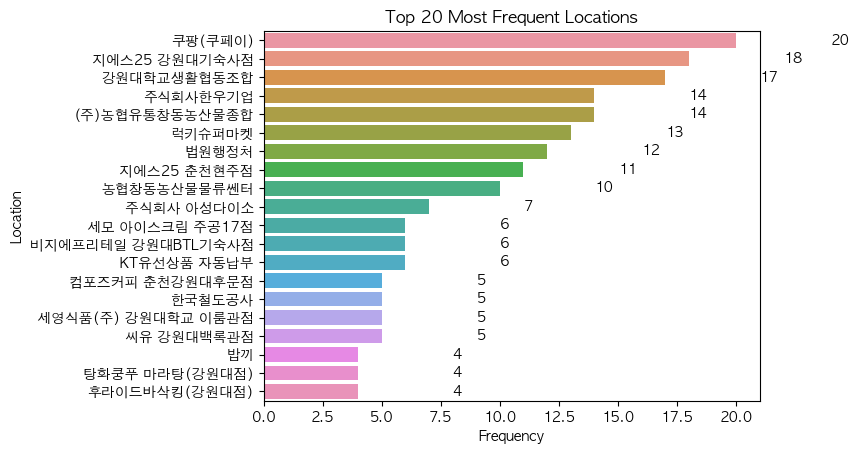

In [19]:
# 3. 빈도가 높은 사용처 순위 시각화
top_locations = df['Location'].value_counts().nlargest(20)
sns.barplot(x=top_locations.values, y=top_locations.index)

for i, v in enumerate(top_locations.values):
    plt.text(v + 4, i, str(v), ha='left', va='center')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Top 20 Most Frequent Locations')
plt.savefig('../result_image/3.(상반기)빈도별카드사용량.jpeg', format='jpeg', dpi=300)
plt.show()

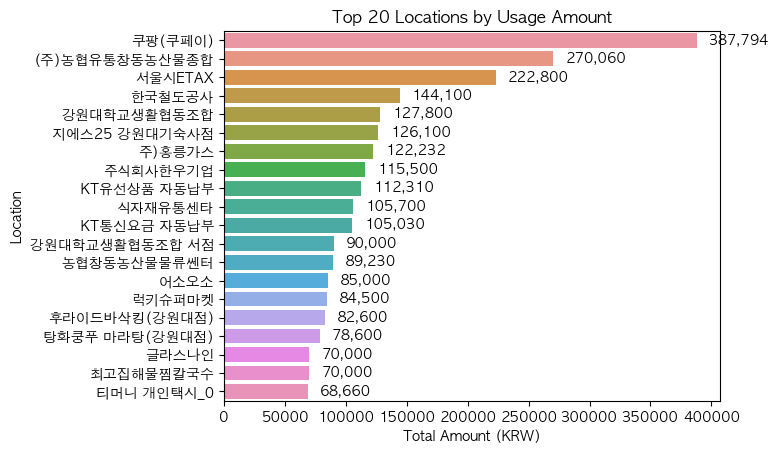

In [20]:
# 4. 사용량이 많은 사용처 순위 시각화
top_usage_locations = df.groupby('Location')['Domestic Amount (KRW)'].sum().nlargest(20)

sns.barplot(x=top_usage_locations.values, y=top_usage_locations.index)

for i, v in enumerate(top_usage_locations.values):
    plt.text(v + 10000, i, '{:,}'.format(v), ha='left', va='center')

plt.xlabel('Total Amount (KRW)')
plt.ylabel('Location')
plt.title('Top 20 Locations by Usage Amount')
plt.savefig('../result_image/4.1.(상반기)사용처기준카드사용량.jpeg', format='jpeg', dpi=300)
plt.show()

In [21]:
# 4-2. (6월)사용량기준 사용처 순위 시각화(6월)
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

# Filter data for June
june_df = df[df['YearMonth'] == '2023-06']
top_usage_locations = june_df.groupby('Location')['Domestic Amount (KRW)'].sum().nlargest(20)

sns.barplot(x=top_usage_locations.values, y=top_usage_locations.index)

for i, v in enumerate(top_usage_locations.values):
    plt.text(v + 10000, i, '{:,}'.format(v), ha='left', va='center')

plt.xlabel('Total Amount (KRW)')
plt.ylabel('Location')
plt.title('Top 20 Locations by Usage Amount (June)')
plt.savefig('../result_image/4.2.(6월)사용량기준 사용처 순위 시각화.jpeg', format='jpeg', dpi=300)
plt.show()

ValueError: min() arg is an empty sequence

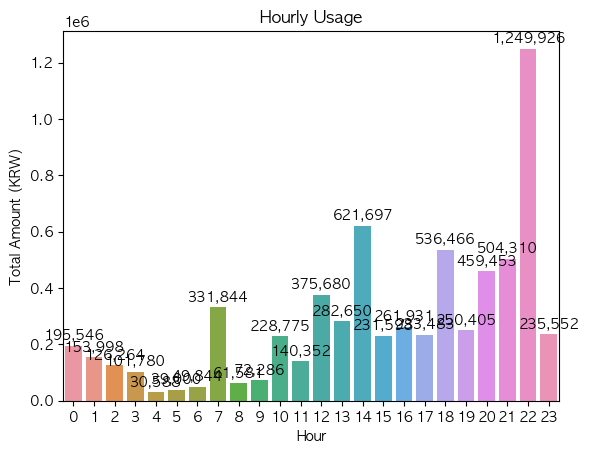

In [ ]:
# 5. 시간대별 사용량 시각화 (한 시간 기준)
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
hourly_usage = df.groupby('Hour')['Domestic Amount (KRW)'].sum()
sns.barplot(x=hourly_usage.index, y=hourly_usage)

for i, v in enumerate(hourly_usage.values):
    plt.text(i, v + 10000, '{:,}'.format(v), ha='center', va='bottom')

plt.xlabel('Hour')
plt.ylabel('Total Amount (KRW)')
plt.title('Hourly Usage')
plt.savefig('../result_image/5.(상반기)시간대별 사용량.jpeg', format='jpeg', dpi=300)
plt.show()

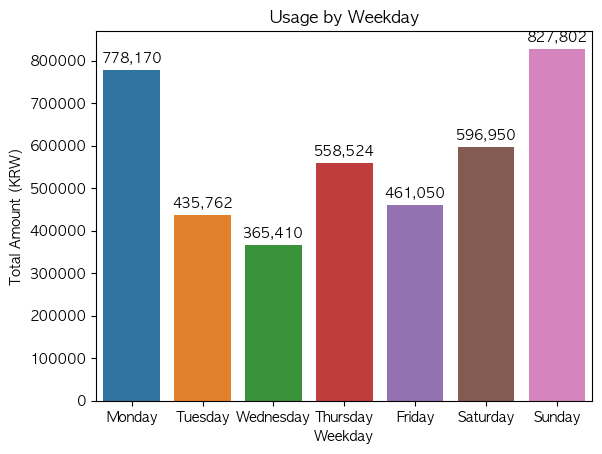

In [22]:
# 6. 요일별 사용량 시각화
df['Weekday'] = df['Date'].dt.weekday
weekday_usage = df.groupby('Weekday')['Domestic Amount (KRW)'].sum()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_labels, y=weekday_usage)

for i, v in enumerate(weekday_usage.values):
    plt.text(i, v + 10000, '{:,}'.format(v), ha='center', va='bottom')

plt.xlabel('Weekday')
plt.ylabel('Total Amount (KRW)')
plt.title('Usage by Weekday')
plt.savefig('../result_image/6.(상반기)요일별 사용량 시각화.jpeg', format='jpeg', dpi=300)
plt.show()